In [1]:
import numpy as np
import pylab as pl
import scipy.interpolate as si

In [2]:
bandes = [443 , 492, 560, 664, 704, 740, 783, 830, 865, 945, 1373, 1613, 2198]

rh = [30, 50, 70, 80, 85, 90, 95]

mi_f_30 = [-0.009793,-0.009726,-0.010272,-0.010906,-0.010942,-0.011706,-0.012620,-0.013639,-0.014406,-0.016001,-0.020941,-0.020808,-0.013995]
mr_f_30 = [1.4793,1.4787,1.4780,1.4774,1.4774,1.4774,1.4724,1.4699,1.4699,1.4697,1.4611,1.4472,1.3884]

mi_f_50 = [-0.007710,-0.007655,-0.008047,-0.008511,-0.008534,-0.009099,-0.009775,-0.010530,-0.011100,-0.012284,-0.015983,-0.015912,-0.011212]
mr_f_50 = [1.4426,1.4416,1.4405,1.4395,1.4395,1.4395,1.4356,1.4336,1.4336,1.4332,1.4253,1.4138,1.3627]

mi_f_70 = [-0.006005,-0.005962,-0.006268,-0.006628,-0.006646,-0.007087,-0.007613,-0.008201,-0.008645,-0.009568,-0.012473,-0.012429,-0.009032]
mr_f_70 = [1.4192,1.4181,1.4167,1.4159,1.4159,1.4151,1.4123,1.4107,1.4103,1.4096,1.4027,1.3929,1.3464]

mi_f_80 = [-0.004860,-0.004825,-0.005072,-0.005364,-0.005379,-0.005735,-0.006161,-0.006637,-0.006996,-0.007743,-0.010114,-0.010088,-0.007568]
mr_f_80 = [1.4037,1.4026,1.4013,1.3995,1.3995,1.3995,1.3969,1.3952,1.3949,1.3941,1.3872,1.3783,1.3355]

mi_f_85 = [-0.003989,-0.003961,-0.004172,-0.004419,-0.004431,-0.004731,-0.005089,-0.005489,-0.005791,-0.006419,-0.008425,-0.008409,-0.006473]
mr_f_85 = [1.3933,1.3918,1.3904,1.3886,1.3885,1.3882,1.3858,1.3843,1.3840,1.3834,1.3767,1.3684,1.3279]

mi_f_90 = [-0.003311,-0.003287,-0.003457,-0.003656,-0.003665,-0.003908,-0.004198,-0.004523,-0.004767,-0.005277,-0.006924,-0.006924,-0.005588]
mr_f_90 = [1.3829,1.3811,1.3796,1.3778,1.3777,1.3770,1.3748,1.3735,1.3732,1.3728,1.3664,1.3588,1.3205]

mi_f_95 = [-0.002200,-0.002185,-0.002297,-0.002429,-0.002435,-0.002597,-0.002790,-0.003005,-0.003168,-0.003507,-0.004636,-0.004653,-0.004167]
mr_f_95 = [1.3675,1.3655,1.3640,1.3622,1.3622,1.3614,1.3599,1.3590,1.3586,1.3578,1.3513,1.3450,1.3095]

In [3]:
mr_f = np.zeros([len(bandes),len(rh)])
mi_f = np.zeros([len(bandes),len(rh)])

In [4]:
mr_f[:,0] = mr_f_30
mr_f[:,1] = mr_f_50
mr_f[:,2] = mr_f_70
mr_f[:,3] = mr_f_80
mr_f[:,4] = mr_f_85
mr_f[:,5] = mr_f_90
mr_f[:,6] = mr_f_95

In [5]:
mi_f[:,0] = mi_f_30
mi_f[:,1] = mi_f_50
mi_f[:,2] = mi_f_70
mi_f[:,3] = mi_f_80
mi_f[:,4] = mi_f_85
mi_f[:,5] = mi_f_90
mi_f[:,6] = mi_f_95

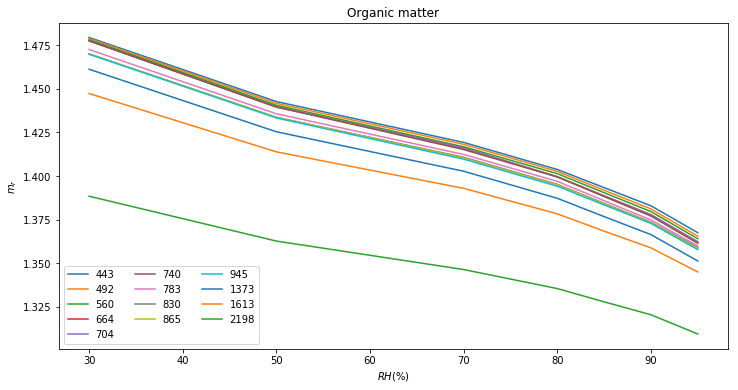

In [6]:
fig, ax = pl.subplots(figsize=(12,6))
for b in range(len(bandes)):
    ax.plot(rh, mr_f[b,:], label=bandes[b])

ax.set_xlabel('$RH (\%)$')
ax.set_ylabel('$m_{r}$')
pl.title('Organic matter')
pl.legend(loc='lower left', ncol=3)

pl.savefig('organic_matter_mr.png')

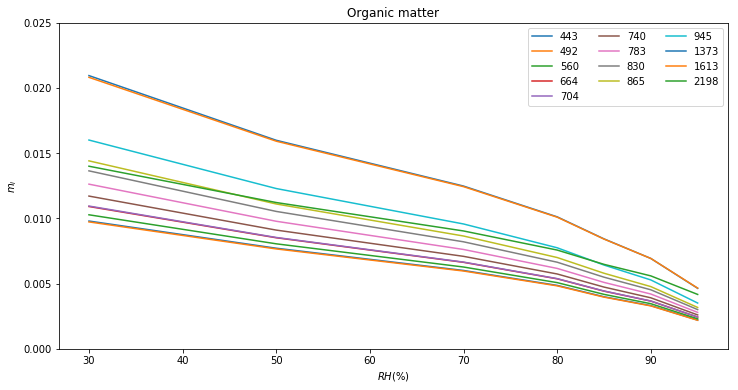

In [7]:
fig, ax = pl.subplots(figsize=(12,6))
for b in range(len(bandes)):
    ax.plot(rh, np.abs(mi_f[b,:]), label=bandes[b])

ax.set_xlabel('$RH (\%)$')
ax.set_ylabel('$m_{i}$')

pl.ylim(0,0.025)
pl.title('Organic matter')
pl.legend(loc='upper right', ncol=3)

pl.savefig('organic_matter_mi.png')

coeff=0.612683


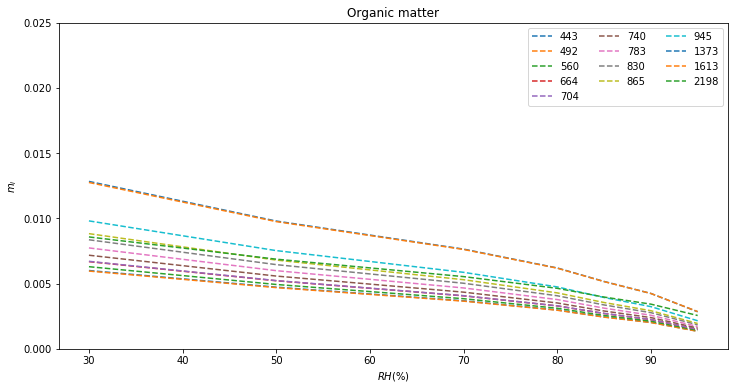

In [8]:
coeff = 0.006 / np.abs(mi_f_30[0]) 
print("coeff=%8.6f" % coeff)

mi_f_low = mi_f * coeff

fig, ax = pl.subplots(figsize=(12,6))
for b in range(len(bandes)):
    ax.plot(rh, np.abs(mi_f_low[b,:]), '--', label=bandes[b])

ax.set_xlabel('$RH (\%)$')
ax.set_ylabel('$m_{i}$')

pl.ylim(0,0.025)
pl.title('Organic matter')
pl.legend(loc='upper right', ncol=3)

pl.savefig('organic_matter_mi_low.png')

In [9]:
for h in range(len(rh)):
    print("RH="+ str(rh[h])+"\n")# mi_f = "+ str(-mi_f_low[:,h]))
    str_mi = "mi_f = ["
    for b in range(len(bandes)):
        if b == 12:
            str_mi +=  str("%8.6f" % (mi_f_low[b,h]))# + ", "
        else:
            str_mi +=  str("%8.6f" % (mi_f_low[b,h])) + ","
        
    str_mi += "]\n"
    print(str_mi)

RH=30

mi_f = [-0.006000,-0.005959,-0.006293,-0.006682,-0.006704,-0.007172,-0.007732,-0.008356,-0.008826,-0.009804,-0.012830,-0.012749,-0.008574]

RH=50

mi_f = [-0.004724,-0.004690,-0.004930,-0.005215,-0.005229,-0.005575,-0.005989,-0.006452,-0.006801,-0.007526,-0.009793,-0.009749,-0.006869]

RH=70

mi_f = [-0.003679,-0.003653,-0.003840,-0.004061,-0.004072,-0.004342,-0.004664,-0.005025,-0.005297,-0.005862,-0.007642,-0.007615,-0.005534]

RH=80

mi_f = [-0.002978,-0.002956,-0.003108,-0.003286,-0.003296,-0.003514,-0.003775,-0.004066,-0.004286,-0.004744,-0.006197,-0.006181,-0.004637]

RH=85

mi_f = [-0.002444,-0.002427,-0.002556,-0.002707,-0.002715,-0.002899,-0.003118,-0.003363,-0.003548,-0.003933,-0.005162,-0.005152,-0.003966]

RH=90

mi_f = [-0.002029,-0.002014,-0.002118,-0.002240,-0.002245,-0.002394,-0.002572,-0.002771,-0.002921,-0.003233,-0.004242,-0.004242,-0.003424]

RH=95

mi_f = [-0.001348,-0.001339,-0.001407,-0.001488,-0.001492,-0.001591,-0.001709,-0.001841,-0.001941,-0.002149,-0.